# Importing dependencies
----------
-------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(42)


%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes' ,labelsize=14)
mpl.rc('xtick' ,labelsize=12)
mpl.rc('ytick' , labelsize=12)

# Ignoring useless warnings
import warnings
warnings.filterwarnings(action='ignore' ,message='^internal gelsd')

## Creating Helper Functions
---------
------

In [174]:
def categorize(data):
    '''Returns two lists, first containing categorical 
    features, second containing numerical features.'''
    categorical_features=[]
    numerical_features=[]
    for col in data.columns:
        if data[col].dtype==('O'):
            #print('{} \t\t--> Categorical'.format(col.upper()))
            categorical_features.append(col)
        elif data[col].dtype==('int64') or data[col].dtype==('float64'):
            #print('{} \t\t--> Numerical'.format(col.upper()))
            numerical_features.append(col)
            
    return categorical_features,numerical_features

In [175]:
def plot_distribution(data,features):
    '''Plots the histogram distribution along with rugplot at bottom, 
    to get the better understanding of the underlying distribution'''
    fig,axes = plt.subplots(len(features),1,figsize=(10,30))
    
    #fig.suptitle('DISTRIBUTION OF FEATURES',fontsize=35,va='top')

    for i,feature in enumerate(features):
        sns.distplot(data[feature],bins=100,kde=True,color='red',ax=axes[i],
                 rug=True,rug_kws={"color": "g"},axlabel=None)

        axes[i].set_title(feature.upper(),fontsize=35,style='italic')
        axes[i].grid(color='b', ls = '-.', lw = 0.35)
        axes[i].set_xlabel(None)
        axes[i].tick_params(axis='x', labelsize=25)
        axes[i].tick_params(axis='y', labelsize=25)
        axes[i].spines['left'].set_linewidth(3.5)
        axes[i].spines['bottom'].set_linewidth(2.5)
        axes[i].spines['top'].set_linewidth(2.5)
        axes[i].spines['right'].set_linewidth(2.5)
 
    fig.tight_layout()


## Get the Data    
-------
--------

In [179]:
titanic = pd.read_csv('titanic_train.csv')

In [180]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Gaining Insights   
-----
-------

In [181]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


$ASSUMPTION$:

-----

***passengerID , Name , Ticket;***  These attributes can be dropped and are way too obvious and random to be understood.

In [182]:
titanic_train= titanic  # Creating the copy of dataset such that original data is kept safe while manupulation is done on copied

In [183]:
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [184]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- **Age , Embarked, Cabin** attribute has missing values.

In [12]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
titanic_train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F33            3
              ..
C70            1
C110           1
C62 C64        1
C49            1
A24            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
titanic_train.iloc[101:151]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
101,0,3,male,NaN,0,0,7.8958,NaN,S
102,0,1,male,21.0,0,1,77.2875,D26,S
103,0,3,male,33.0,0,0,8.6542,NaN,S
104,0,3,male,37.0,2,0,7.9250,NaN,S
105,0,3,male,28.0,0,0,7.8958,NaN,S
106,1,3,female,21.0,0,0,7.6500,NaN,S
107,1,3,male,NaN,0,0,7.7750,NaN,S
108,0,3,male,38.0,0,0,7.8958,NaN,S
109,1,3,female,NaN,1,0,24.1500,NaN,Q
110,0,1,male,47.0,0,0,52.0000,C110,S


In [16]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [186]:
cf,nf=categorize(data=titanic_train)  #cf = categorical features; nf= numerical features

In [187]:
print("Categorical Feature: ",cf,"Numerical Feature: ",nf,sep='\n')

Categorical Feature: 
['Sex', 'Cabin', 'Embarked']
Numerical Feature: 
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


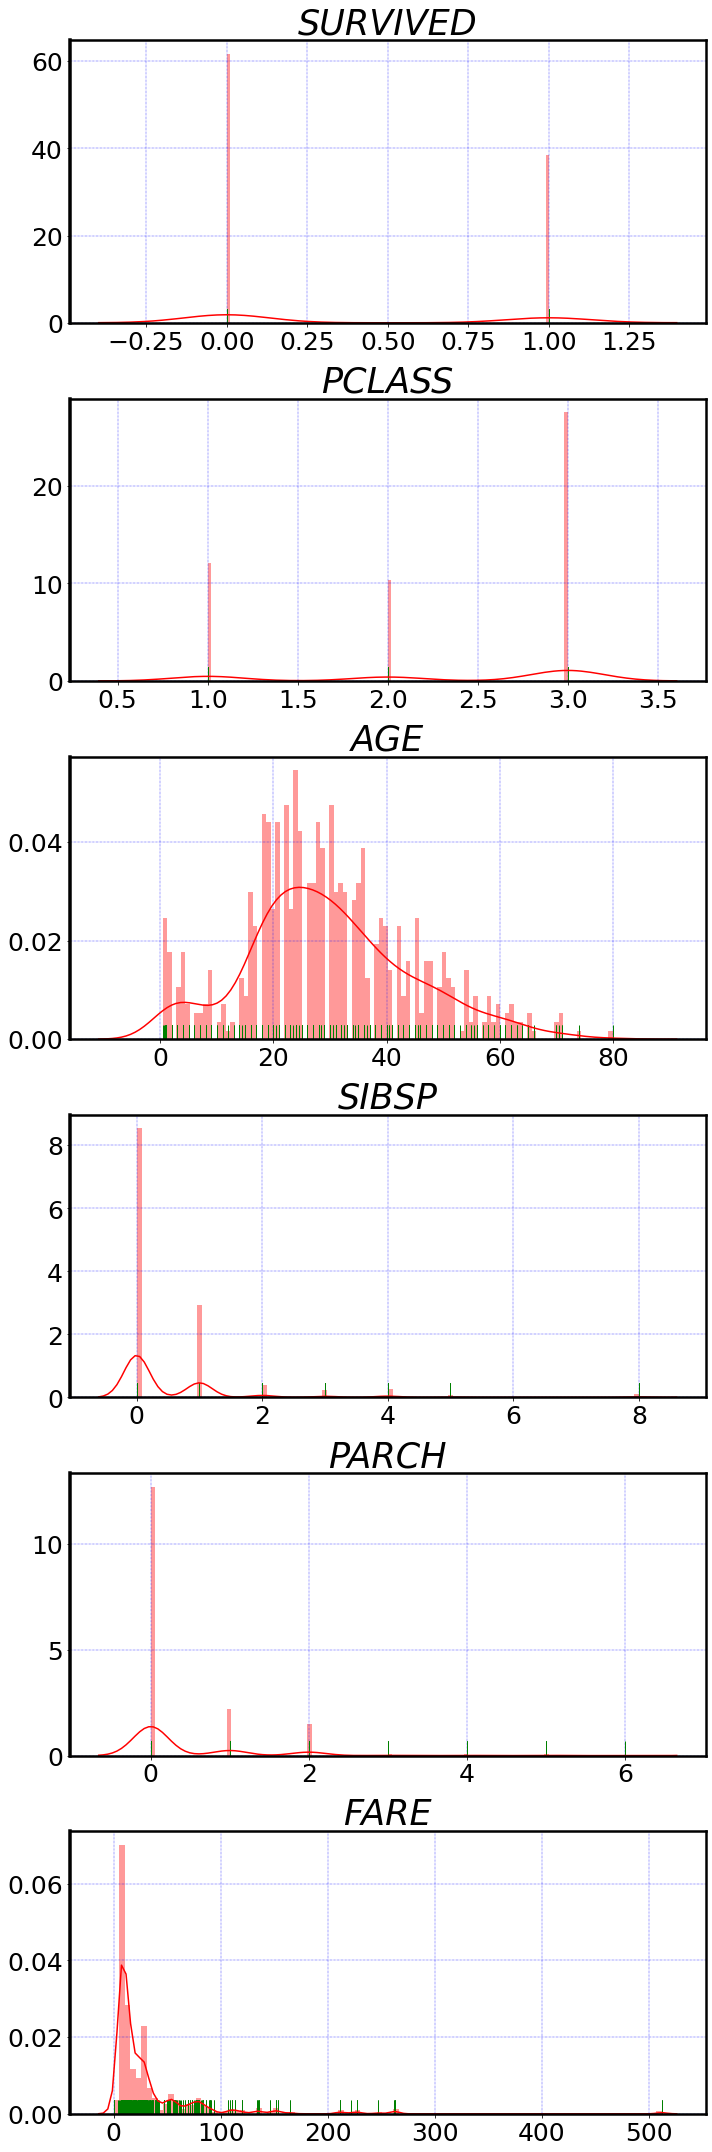

In [19]:
plot_distribution(data=titanic_train,features=nf)

In [20]:
titanic_train2 = titanic_train

In [21]:
titanic_train2.Survived.unique()

array([0, 1], dtype=int64)

In [22]:
titanic_train2_survived_list = [1]

In [23]:
titanic_train_survived = titanic_train2[titanic_train2.Survived.isin(titanic_train2_survived_list)]

In [24]:
titanic_train_survived.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [25]:
titanic_train_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  342 non-null    int64  
 1   Pclass    342 non-null    int64  
 2   Sex       342 non-null    object 
 3   Age       290 non-null    float64
 4   SibSp     342 non-null    int64  
 5   Parch     342 non-null    int64  
 6   Fare      342 non-null    float64
 7   Cabin     136 non-null    object 
 8   Embarked  340 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 26.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A74652C40>,
      dtype=object)

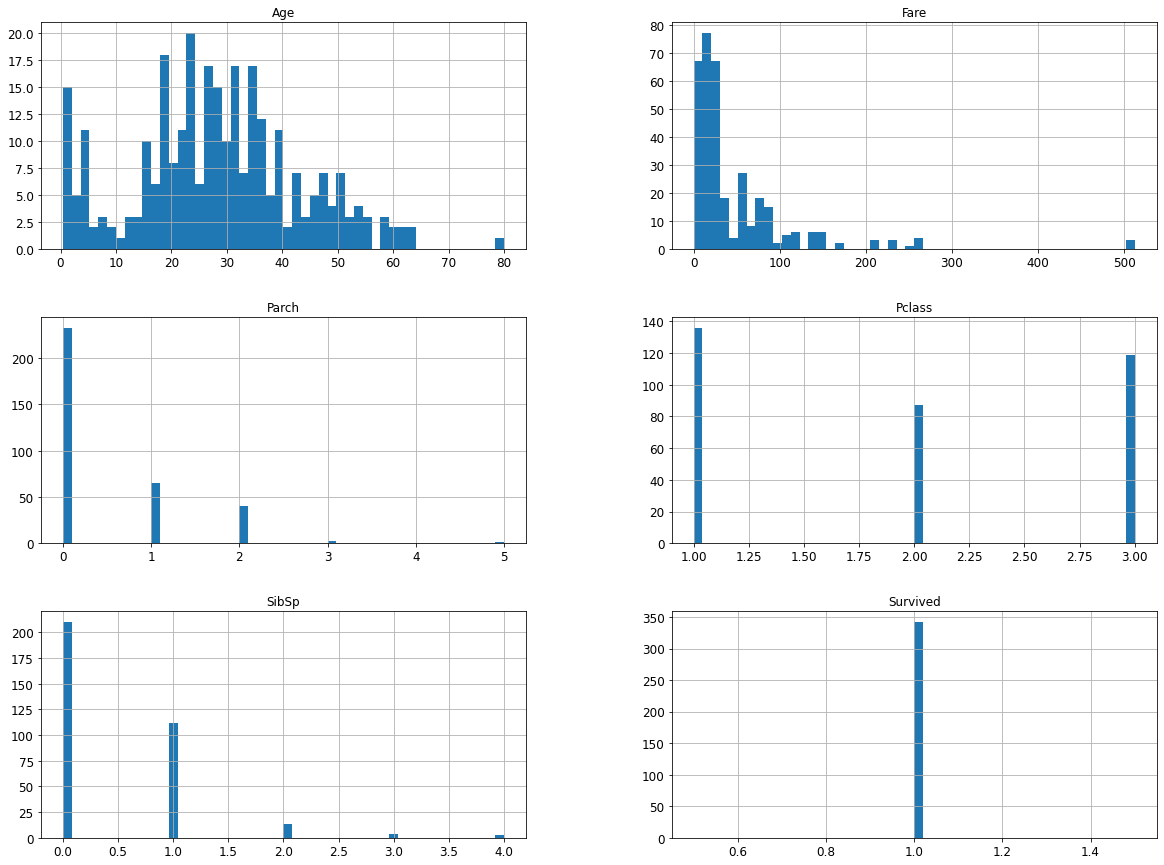

In [26]:
titanic_train_survived.hist(bins=50 , figsize=(20,15))

In [27]:
titanic_train_survived['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [28]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [29]:
136/216

0.6296296296296297

In [30]:
87/184

0.47282608695652173

In [31]:
119/491

0.24236252545824846

- Therefore, we can infer that, if a person is travelling in Ist class, it has maximum chance of survival.
-----

In [32]:
titanic_train_survived['Age'].value_counts()

24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
80.00     1
7.00      1
32.50     1
12.00     1
0.67      1
Name: Age, Length: 65, dtype: int64

In [33]:
titanic_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [34]:
titanic_train_survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [35]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
(titanic_train[titanic_train.Age<=20]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 7 to 887
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    object 
 3   Age       179 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Fare      179 non-null    float64
 7   Cabin     29 non-null     object 
 8   Embarked  179 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.0+ KB


In [37]:
(titanic_train_survived[titanic_train_survived.Age<=20]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 9 to 887
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  82 non-null     int64  
 1   Pclass    82 non-null     int64  
 2   Sex       82 non-null     object 
 3   Age       82 non-null     float64
 4   SibSp     82 non-null     int64  
 5   Parch     82 non-null     int64  
 6   Fare      82 non-null     float64
 7   Cabin     23 non-null     object 
 8   Embarked  82 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.4+ KB


In [38]:
82/179

0.4581005586592179

- A person having age <= 36, has 42% chance of survival.
**(Survived/Total on board)**
- We are considering age=36 as our parameter of survival by aging, because 75% percent of onboard people have there age less than 36 years.
------

In [39]:
titanic_train_survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [40]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
233/314

0.7420382165605095

In [42]:
109/577

0.18890814558058924

In [43]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic_train_survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [45]:
titanic_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
titanic_train_survived['Parch'].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [47]:
233/678

0.34365781710914456

In [48]:
65/118

0.5508474576271186

- From **Parch** we can infer that, lesser SibSp more likely the person to survived.
-----

In [49]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
titanic_train_survived['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [51]:
217/644

0.33695652173913043

In [52]:
93/168

0.5535714285714286

- A person embarked from 'C' have more chances of survival.

In [53]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Preparing the Data for Machine Learning Algorithms   :>

#### Data Cleaning (Dealing with NaN values)  :
-----
- **Get rid of NaN value instance.**         -->dropna()
- **Get rid of NaN attribute completely**    -->drop()
- **Filling the NaN value by median**        -->fillna()
-----

In [54]:
titanic_train2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
titanic_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- **Age** attribute has missing values (as it is numerical attribute, we can implement 'Medain' strategy)
- **Embarked** attribute has two missing values (as it is categorical attribute, we have to first convert it into numerical attribute)

### Create a Test Set by Stratified Shuffling   :
-------
- Passenger Class can be used as stratifying attribute

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index, test_index in split.split(titanic_train2, titanic_train2['Pclass']):
    strat_train_set = titanic_train2.loc[train_index]
    strat_test_set = titanic_train2.loc[test_index]

In [57]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       574 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Cabin     161 non-null    object 
 8   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [58]:
titanic_train2['Pclass'].value_counts() / len(titanic_train2)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [59]:
strat_train_set['Pclass'].value_counts() / len(strat_train_set)

3    0.550562
1    0.242978
2    0.206461
Name: Pclass, dtype: float64

In [60]:
strat_test_set['Pclass'].value_counts() / len(strat_test_set)

3    0.553073
1    0.240223
2    0.206704
Name: Pclass, dtype: float64

- Therefore, our dataset is shuffled in a stratifed manner.
-------------

#### Separating 'Predictors'  and 'Labels'   :

In [61]:
titanic_labels = strat_train_set['Survived'].copy()

In [62]:
strat_train_set.drop('Survived' , axis=1 , inplace = True)

In [63]:
titanic_predictors = strat_train_set.copy()

In [64]:
titanic_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
820,1,female,52.0,1,1,93.5000,B69,S
439,2,male,31.0,0,0,10.5000,NaN,S
821,3,male,27.0,0,0,8.6625,NaN,S
403,3,male,28.0,1,0,15.8500,NaN,S
343,2,male,25.0,0,0,13.0000,NaN,S


In [65]:
titanic_labels.head()

820    1
439    0
821    1
403    0
343    0
Name: Survived, dtype: int64

- Filling the **Age** attributes missing NaN values by Median.

In [66]:
median = titanic_predictors['Age'].median()

In [67]:
sample_incomplete_rows = titanic_predictors[titanic_predictors.isnull().any(axis=1)]
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
439,2,male,31.0,0,0,10.5000,NaN,S
821,3,male,27.0,0,0,8.6625,NaN,S
403,3,male,28.0,1,0,15.8500,NaN,S
343,2,male,25.0,0,0,13.0000,NaN,S
514,3,male,24.0,0,0,7.4958,NaN,S
...,...,...,...,...,...,...,...,...
832,3,male,NaN,0,0,7.2292,NaN,C
470,3,male,NaN,0,0,7.2500,NaN,S
13,3,male,39.0,1,5,31.2750,NaN,S
51,3,male,21.0,0,0,7.8000,NaN,S


In [68]:
sample_incomplete_rows['Age'].fillna(median, inplace=True)
sample_incomplete_rows

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
439,2,male,31.0,0,0,10.5000,NaN,S
821,3,male,27.0,0,0,8.6625,NaN,S
403,3,male,28.0,1,0,15.8500,NaN,S
343,2,male,25.0,0,0,13.0000,NaN,S
514,3,male,24.0,0,0,7.4958,NaN,S
...,...,...,...,...,...,...,...,...
832,3,male,28.0,0,0,7.2292,NaN,C
470,3,male,28.0,0,0,7.2500,NaN,S
13,3,male,39.0,1,5,31.2750,NaN,S
51,3,male,21.0,0,0,7.8000,NaN,S


#### Using Imputer:
-----
- Imputer is used to make sure that all the numerical attributes present do not contain any 'NaN' values.
    - Therefore, to use Imputer we have to drop the categorical and text attributes.

In [69]:
titanic_predictors2 = titanic_predictors

In [70]:
titanic_predictors2.drop('Sex' , inplace=True,axis=1)

In [71]:
titanic_predictors2.drop('Cabin' ,inplace=True,  axis=1)

In [72]:
titanic_predictors2.drop('Embarked' , inplace=True, axis=1)

In [73]:
titanic_predictors2.head()

,Pclass,Age,SibSp,Parch,Fare
820,1,52.0,1,1,93.5000
439,2,31.0,0,0,10.5000
821,3,27.0,0,0,8.6625
403,3,28.0,1,0,15.8500
343,2,25.0,0,0,13.0000


In [74]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [75]:
imputer.fit(titanic_predictors2)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [76]:
imputer.statistics_

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [77]:
X = imputer.transform(titanic_predictors2)

In [78]:
titanic_predictors_tr = pd.DataFrame(X , columns= titanic_predictors2.columns,
                                    index=titanic_predictors2.index)
titanic_predictors_tr.head()

,Pclass,Age,SibSp,Parch,Fare
820,1.0,52.0,1.0,1.0,93.5000
439,2.0,31.0,0.0,0.0,10.5000
821,3.0,27.0,0.0,0.0,8.6625
403,3.0,28.0,1.0,0.0,15.8500
343,2.0,25.0,0.0,0.0,13.0000


#### Handling Text And Categorical Attributes   :
---------
- **Sex** and **Embarked** are two categorical attributes

In [79]:
titanic_predictors.head()

,Pclass,Age,SibSp,Parch,Fare
820,1,52.0,1,1,93.5000
439,2,31.0,0,0,10.5000
821,3,27.0,0,0,8.6625
403,3,28.0,1,0,15.8500
343,2,25.0,0,0,13.0000


In [80]:
titanic_predictors = strat_train_set.copy()

In [81]:
titanic_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
820,1,female,52.0,1,1,93.5000,B69,S
439,2,male,31.0,0,0,10.5000,NaN,S
821,3,male,27.0,0,0,8.6625,NaN,S
403,3,male,28.0,1,0,15.8500,NaN,S
343,2,male,25.0,0,0,13.0000,NaN,S


In [82]:
titanic_predictors_cat = titanic_predictors[['Embarked','Sex']]
titanic_predictors_cat.head()

,Embarked,Sex
820,S,female
439,S,male
821,S,male
403,S,male
343,S,male


In [83]:
titanic_predictors_cat.head()

,Embarked,Sex
820,S,female
439,S,male
821,S,male
403,S,male
343,S,male


- We will be using Ordinal Encoder, firstly to transform it into binary encoding.
-------
- As the attribute **Embarked** contains the missing NaN values, we should take care of it first.
    - As the number of instances are very less in number for this case, we should remove that particular instances.
    
    
    
    -------

In [84]:
sample_incomplete_rows = titanic_predictors_cat[titanic_predictors_cat.isnull().any(axis=1)].head()

In [85]:
sample_incomplete_rows.columns

Index(['Embarked', 'Sex'], dtype='object')

In [86]:
titanic_predictors_cat[titanic_predictors_cat.isnull().any(axis=1)].head()

,Embarked,Sex
61,NaN,female
829,NaN,female


In [87]:
titanic_predictors_cat.fillna('S' , axis=1 , inplace=True)

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [88]:
titanic_predictors_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  712 non-null    object
 1   Sex       712 non-null    object
dtypes: object(2)
memory usage: 16.7+ KB


In [89]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
titanic_predictors_cat_encoded = ordinal_encoder.fit_transform(titanic_predictors_cat)
titanic_predictors_cat_encoded[:10]

array([[2., 0.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 0.],
       [2., 1.],
       [2., 1.],
       [2., 1.]])

In [90]:
titanic_train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [91]:
titanic_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
820,1,female,52.0,1,1,93.5000,B69,S
439,2,male,31.0,0,0,10.5000,NaN,S
821,3,male,27.0,0,0,8.6625,NaN,S
403,3,male,28.0,1,0,15.8500,NaN,S
343,2,male,25.0,0,0,13.0000,NaN,S


In [92]:
titanic_predictors.drop('Cabin' , axis=1 , inplace=True)

In [93]:
titanic_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
820,1,female,52.0,1,1,93.5000,S
439,2,male,31.0,0,0,10.5000,S
821,3,male,27.0,0,0,8.6625,S
403,3,male,28.0,1,0,15.8500,S
343,2,male,25.0,0,0,13.0000,S


In [94]:
titanic_predictors_cat[titanic_predictors_cat.isnull().any(axis=1)].head()

,Embarked,Sex


In [95]:
titanic_predictors_cat.fillna('S' , axis=1 , inplace=True)

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [96]:
titanic_predictors_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  712 non-null    object
 1   Sex       712 non-null    object
dtypes: object(2)
memory usage: 16.7+ KB


In [97]:
titanic_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       574 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [98]:
titanic_predictors.drop('Sex',inplace=True,axis=1)
titanic_predictors.drop('Embarked',inplace=True,axis=1)

In [99]:
titanic_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    int64  
 1   Age     574 non-null    float64
 2   SibSp   712 non-null    int64  
 3   Parch   712 non-null    int64  
 4   Fare    712 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [100]:
titanic_predictors[['Embarked','Sex']]=titanic_predictors_cat

In [101]:
titanic_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Age       574 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   Embarked  712 non-null    object 
 6   Sex       712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [102]:
ordinal_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object), array(['female', 'male'], dtype=object)]

#### One-Hot Encoding     :
-----

In [103]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
titanic_predictors_cat_1hot =cat_encoder.fit_transform(titanic_predictors_cat)
titanic_predictors_cat_1hot

<712x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1424 stored elements in Compressed Sparse Row format>

In [104]:
titanic_predictors_cat_1hot.toarray()

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       ...,
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [105]:
cat_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object), array(['female', 'male'], dtype=object)]

#### Creating Pipelines::
-------

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer' , SimpleImputer(strategy='median')),
                        ('std_scaler' , StandardScaler()),])
titanic_num_tr= num_pipeline.fit_transform(titanic_predictors_tr)

In [107]:
titanic_num_tr

array([[-1.56405658e+00,  1.76806358e+00,  4.40644117e-01,
         7.59653137e-01,  1.25924300e+00],
       [-3.67914491e-01,  1.47311532e-01, -4.90330991e-01,
        -4.78042592e-01, -4.47327368e-01],
       [ 8.28227599e-01, -1.61403143e-01, -4.90330991e-01,
        -4.78042592e-01, -4.85108369e-01],
       ...,
       [ 8.28227599e-01, -6.24475155e-01, -4.90330991e-01,
        -4.78042592e-01, -5.02842308e-01],
       [-1.56405658e+00,  2.46267159e+00, -4.90330991e-01,
        -4.78042592e-01,  1.33203801e-03],
       [-3.67914491e-01, -8.56011162e-01, -4.90330991e-01,
        -4.78042592e-01, -4.26766279e-01]])

For categorical and text attributes

In [108]:
titanic_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Age       574 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   Embarked  712 non-null    object 
 6   Sex       712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [109]:
from sklearn.compose import ColumnTransformer

In [110]:
num_attribs = list(titanic_predictors_tr)
cat_attribs = list(['Sex','Embarked'])

full_pipeline = ColumnTransformer([
    ('num' , num_pipeline, num_attribs),
    ('cat' , OneHotEncoder() , cat_attribs)
])

titanic_prepared = full_pipeline.fit_transform(titanic_predictors)

In [111]:
titanic_prepared.shape

(712, 10)

### Selecting and Training a Model  ::
---------
- Let us use **Logistic Regression**

In [112]:
X = titanic_prepared
y= titanic_labels

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logmodel = LogisticRegression()

In [115]:
logmodel.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    object 
 3   Age       140 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Fare      179 non-null    float64
 7   Cabin     43 non-null     object 
 8   Embarked  179 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.0+ KB


In [117]:
y_test = strat_test_set['Survived'].copy()

In [118]:
strat_test_set.drop('Survived' , axis=1 , inplace=True)

In [119]:
strat_test_set.drop('Cabin' , axis=1 , inplace =True)

In [120]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    object 
 2   Age       140 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.2+ KB


In [121]:
X_test = strat_test_set

In [122]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    object 
 2   Age       140 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.2+ KB


In [123]:
titanic_test_prepared = full_pipeline.fit_transform(X_test)

In [124]:
predictions1 = logmodel.predict(X)

In [125]:
from sklearn.metrics import classification_report

In [126]:
classification_report(y , predictions1)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       432\n           1       0.77      0.73      0.75       280\n\n    accuracy                           0.81       712\n   macro avg       0.80      0.79      0.80       712\nweighted avg       0.81      0.81      0.81       712\n'

In [127]:
from sklearn.metrics import precision_score, recall_score

precision_score(y,predictions1)

0.769811320754717

In [128]:
recall_score(y,predictions1)

0.7285714285714285

In [129]:
from sklearn.metrics import accuracy_score

accuracy_score(y , predictions1)

0.8075842696629213

In [130]:
from sklearn.model_selection import cross_val_predict

predictions1 = cross_val_predict(logmodel, X, y, cv=3 )

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y , predictions1)
cf_matrix=confusion_matrix(y , predictions1)

In [132]:
cf_matrix

array([[376,  56],
       [ 81, 199]], dtype=int64)

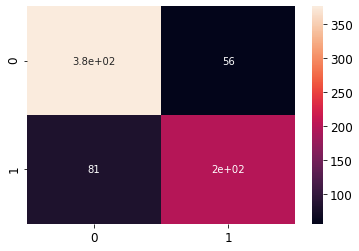

In [133]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,)

In [134]:
from sklearn.metrics import f1_score

f1_score(y, predictions1)

0.7439252336448597

##### Logistic Model  :
- We are getting 'Precision' = 78% and 'Recall' = 71%
- Overall 'Accuracy' of the Logistic model = 80%
- F1 score  = 75%
---------

------------------------------------------
#### Training another classifier model    :
------------
- SVM

In [135]:
from sklearn.svm import SVC

In [136]:
svm_clf = SVC(C=1.0, kernel='rbf')
svm_clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
predictions = svm_clf.predict(X)

In [138]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [139]:
precision_score(y , predictions)

0.8455284552845529

In [140]:
recall_score(y, predictions)

0.7428571428571429

In [141]:
from sklearn.metrics import f1_score

f1_score(y, predictions)

0.7908745247148288

In [142]:
accuracy_score(y, predictions)

0.8455056179775281

##### SVM Model  :
- We are getting 'Precision' = 78% and 'Recall' = 71%
- Overall 'Accuracy' of the Logistic model = 80%
- F1 score  = 75%
---------

### Training Decision Tree Model  :
-------

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best' )

In [145]:
tree_clf.fit(X ,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
predictionsDTree = tree_clf.predict(X)

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [148]:
precision_score(y ,predictionsDTree )

1.0

In [149]:
recall_score(y,predictionsDTree)

0.9571428571428572

- Decision Tree classifier has clearly overfit the data.
---------

#### Random Forest Model  ::
-----

In [150]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()


In [151]:
rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
predictionsRnd = rnd_clf.predict(X)

In [153]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [154]:
precision_score(y, predictionsRnd)

0.9890510948905109

In [155]:
accuracy_score(y , predictionsRnd)

0.9831460674157303

In [156]:
recall_score(y , predictionsRnd)

0.9678571428571429

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
confusion_matrix(y , predictionsRnd)

array([[429,   3],
       [  9, 271]], dtype=int64)

#### Using SGDClassifier     :
------

In [159]:
from sklearn.linear_model import SGDClassifier

In [160]:
sgd_clf = SGDClassifier()

In [161]:
sgd_clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
predictionsSGD= sgd_clf.predict(X)

In [163]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [164]:
recall_score(y, predictionsSGD)

0.8107142857142857

In [165]:
precision_score(y , predictionsSGD)

0.6467236467236467

In [166]:
accuracy_score(y , predictionsSGD)

0.7514044943820225

---------
- Let us using ensemble technique and combine SGDClassifier, SVC, Logistic
    - **Hard-Voting Classifier**

In [167]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators=[('lr' , logmodel), ('svc' , svm_clf) , ('sgd' , sgd_clf) ],
voting = 'hard')

In [168]:
voting_clf.fit(X , y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  d...
                                            class_weight=None,
            

In [169]:
from sklearn.metrics import accuracy_score

for clf in (logmodel, svm_clf, sgd_clf ,voting_clf):
    clf.fit(X, y)
    predictionsVoting = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, predictionsVoting))

LogisticRegression 0.8075842696629213
SVC 0.8455056179775281
SGDClassifier 0.7682584269662921
VotingClassifier 0.8174157303370787


-----------
- Let us select SVC model and fine tune its hyperparameter, to improve its accuracy

In [170]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

estimator = SVC()
params_distribs = {
    'degree' : randint(low=1 , high=10),
    'kernel' : ('rbf' , 'linear'),
    'max_iter' : randint(low=100 , high=1000),
    
}

def hypertuning_rscv(est, p_distr, nbr_iter , X, y):
    rdmsearch = RandomizedSearchCV(est , param_distributions = p_distr, 
                                   n_jobs=-1 , n_iter = nbr_iter , cv=9)
    
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    
    return ht_params , ht_score


svc_param , svc_ht_score = hypertuning_rscv(estimator, params_distribs, 40 ,X,y )



In [171]:
strat_test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
132,3,female,47.0,1,0,14.5000,S
3,1,female,35.0,1,0,53.1000,S
270,1,male,NaN,0,0,31.0000,S
421,3,male,21.0,0,0,7.7333,Q
154,3,male,NaN,0,0,7.3125,S


In [172]:
y_test.head()

132    0
3      1
270    0
421    0
154    0
Name: Survived, dtype: int64

In [173]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    object 
 2   Age       140 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.2+ KB
